<a href="https://colab.research.google.com/github/Tiru-Kaggundi/Trade_Stuff/blob/main/Oec_districts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from ecomplexity import ecomplexity, proximity
import numpy as np
import plotly.graph_objects as go
import community as community_louvain

In [ ]:
!pip install ecomplexity
!pip install plotly python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ecomplexity: filename=ecomplexity-0.5.2-py3-none-any.whl size=11268 sha256=cf402085ef4358173f27679ac7579176e554a830623d02c3e071da9184caa001
  Stored in directory: /root/.cache/pip/wheels/a9/f4/30/1518af0a20cc7b77a37d94f9725d32912ef9a628e8d3a59bcc
Successfully built ecomplexity
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to the Excel file in your Google Drive
file_path = '/content/drive/MyDrive/OEC_Districts/andhra_pradesh.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path, usecols=['District', 'HS Code', 'Commodity Description', 'FY23'])

# Rename the columns to match the names expected by the py-ecomplexity library
df = df.rename(columns={
    'District': 'district',
    'HS Code': 'product',
    'Commodity Description': 'product_desc',
    'FY23': 'export_value'
})

# Display the first few rows of the DataFrame
df.district.unique()

array(['ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KRISHNA',
       'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'Y.S.R.'],
      dtype=object)

In [ ]:
display(df)

In [ ]:
#district_data = df[df['district'] == 'ANANTAPUR']
district_data = df.copy()

district_data['year'] = 2023
trade_cols = {'time':'year', 'loc':'district', 'prod':'product', 'val':'export_value'}

# Calculate economic complexity
complexity_results = ecomplexity(district_data, trade_cols)

# Calculate product proximity
proximity_results = proximity(district_data, trade_cols)

2023
2023


In [ ]:
complexity_results[complexity_results['district']=="CHITTOOR"]

,district,product,export_value,year,diversity,ubiquity,mcp,eci,pci,density,coi,cog,rca,product_desc
723,CHITTOOR,104,0,2023,271,1,0,1.069284,0.838113,0.200000,-1.023127,0.468372,0.000000,NaN
724,CHITTOOR,105,0,2023,271,1,0,1.069284,0.838113,0.200000,-1.023127,0.468372,0.000000,NaN
725,CHITTOOR,202,282505,2023,271,2,0,1.069284,-1.002321,0.149547,-1.023127,-1.192586,0.040119,"MEAT OF BOVINE ANIMALS, FROZEN"
726,CHITTOOR,206,0,2023,271,2,0,1.069284,-1.002321,0.149547,-1.023127,-1.192586,0.000000,NaN
727,CHITTOOR,302,636686,2023,271,2,1,1.069284,0.691704,0.904717,-1.023127,-0.000000,5.352761,"FISH, FRESH OR CHILLED, EXCLUDING FISH FILLETS..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,CHITTOOR,9610,0,2023,271,1,0,1.069284,0.963304,0.109838,-1.023127,0.515608,0.000000,NaN
1442,CHITTOOR,9615,0,2023,271,1,0,1.069284,-3.026518,0.057904,-1.023127,-2.612074,0.000000,NaN
1443,CHITTOOR,9619,9357464,2023,271,1,1,1.069284,1.471924,1.000000,-1.023127,0.000000,10.110855,"SANITARY TOWELS (PADS) AND TAMPONS, NAPKINS(DI..."
1444,CHITTOOR,9801,3030,2023,271,1,0,1.069284,1.021876,0.186558,-1.023127,0.646104,0.527537,PROJECT GOODS


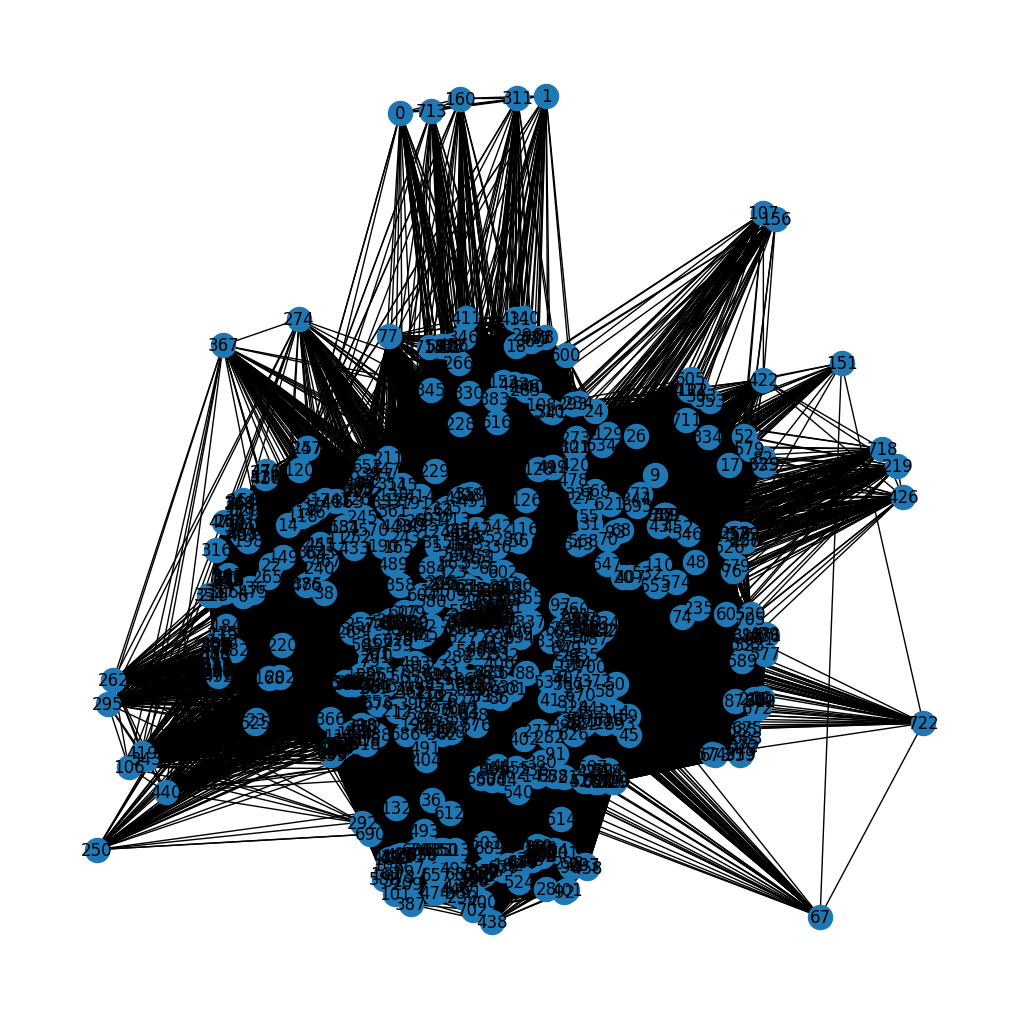

In [ ]:
# Load the data - this time for drawing the network diagram
file_path = '/content/drive/MyDrive/OEC_Districts/andhra_pradesh.xlsx'

# Read the Excel file into a pandas DataFrame
df1 = pd.read_excel(file_path, usecols=['District', 'HS Code', 'Commodity Description', 'FY23'])

# Create a binary matrix where the rows and columns are products
# and a cell contains a 1 if the corresponding products were both exported from the same district
df = df1.copy()
binary_matrix = pd.get_dummies(df.set_index('District')['HS Code']).groupby(level=0).max()
coexport_matrix = binary_matrix.T @ binary_matrix
np.fill_diagonal(coexport_matrix.values, 0)

# Create the product space graph
G = nx.from_numpy_array(coexport_matrix.values)

# Plot the product space
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
# Load the data - this time for drawing the network diagram
file_path = '/content/drive/MyDrive/OEC_Districts/andhra_pradesh.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path, usecols=['District', 'HS Code', 'Commodity Description', 'FY23'])

# Create a binary matrix where the rows and columns are products
binary_matrix = pd.get_dummies(df.set_index('District')['HS Code']).groupby(level=0).max()
coexport_matrix = binary_matrix.T @ binary_matrix
np.fill_diagonal(coexport_matrix.values, 0)

# Create the product space graph
G = nx.from_numpy_array(coexport_matrix.values)

# Compute the best partition of the graph (i.e., the communities)
partition = community_louvain.best_partition(G)

# Create a trace for the nodes
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Communities',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

# Create a trace for the edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Add the nodes to the node trace
for node in G.nodes():
    node_trace['x'] += tuple([G.nodes[node]['x']])
    node_trace['y'] += tuple([G.nodes[node]['y']])
    node_trace['marker']['color'] += tuple([partition[node]])
    node_trace['text'] += tuple([f'Node {node}: Community {partition[node]}'])

# Add the edges to the edge trace
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['x'], G.nodes[edge[0]]['y']
    x1, y1 = G.nodes[edge[1]]['x'], G.nodes[edge[1]]['y']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Create a layout
layout = go.Layout(
    title='Product Space Graph',
    titlefont_size=16,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20, l=5, r=5, t=40),
    annotations=[
        dict(
            text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
            showarrow=False,
            xref="paper", yref="paper",
            x=0.005, y=-0.002)],
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Show the figure
fig.show()



AttributeError: ignored